# Climate Change Twitter Text Report


In this text report we will looking at the sentiment towards climate change form twitter between April 3 - 4 in 2013. The goal is to discover what what people thought about climate change from this period of time. We are also looking for the ideas thagt people said the most about climate change and what were some of the most frequenty ideas people twitted about.

importing libaries for this report

In [1]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import warnings
from matplotlib import pyplot as plt
from datetime import datetime as dt
from scipy import stats

Importing the file

In [2]:
climate = pd.read_csv('ClimateChange2.csv')

In [3]:
climate.keys()

Index(['Unnamed: 0', 'Date', 'Title', 'Url', 'Domain', 'Language', 'Author',
       'Full Name', 'Full Text', 'Impressions', 'Original Url',
       'Thread Author', 'Thread Created Date', 'Thread Entry Type',
       'Twitter Followers', 'Twitter Following', 'Twitter Reply Count',
       'Twitter Retweets', 'Twitter Verified'],
      dtype='object')

In [24]:
climate.head()

,Unnamed: 0,Date,Title,Url,Domain,Language,Author,Full Name,Full Text,Impressions,Original Url,Thread Author,Thread Created Date,Thread Entry Type,Twitter Followers,Twitter Following,Twitter Reply Count,Twitter Retweets,Twitter Verified
0,0,2013-04-04 23:59:06.0,RT @MarionGroves Abbott says 10yrs ago he wore...,http://twitter.com/Qldaah/statuses/31996236101...,twitter.com,en,Qldaah,Qldaah (David Marler),RT @MarionGroves Abbott says 10yrs ago he wore...,1413,http://twitter.com/Qldaah/statuses/31996236101...,NaN,NaN,post,1413,1990,0,0,False
1,2,2013-04-04 23:58:04.0,RT @NSWFarmers RT @AustFarmInstitu: Two climat...,http://twitter.com/TheFacelessSpin/statuses/31...,twitter.com,en,TheFacelessSpin,TheFacelessSpin (FacelessFocusGroup),RT @NSWFarmers RT @AustFarmInstitu: Two climat...,1063,http://twitter.com/TheFacelessSpin/statuses/31...,NaN,NaN,post,1063,471,0,0,False
2,3,2013-04-04 23:57:33.0,Steve Stockman Hopes James Hansen's NASA Retir...,http://twitter.com/iamgreenbean/statuses/31996...,twitter.com,en,iamgreenbean,iamgreenbean (Green Bean),Steve Stockman Hopes James Hansen's NASA Retir...,4365,http://twitter.com/iamgreenbean/statuses/31996...,NaN,NaN,post,4365,4369,0,0,False
3,4,2013-04-04 23:57:01.0,Ted Turner Tells Obama to Get 'Climate Change ...,http://twitter.com/cpwilldo/statuses/319961839...,twitter.com,en,cpwilldo,cpwilldo (chris price),Ted Turner Tells Obama to Get 'Climate Change ...,3477,http://twitter.com/cpwilldo/statuses/319961839...,NaN,NaN,post,3477,3806,0,0,False
4,5,2013-04-04 23:56:52.0,The human race will never fully adapt to clima...,http://twitter.com/GreenSteve_com/statuses/319...,twitter.com,en,GreenSteve_com,GreenSteve_com (Green Steve),The human race will never fully adapt to clima...,5298,http://twitter.com/GreenSteve_com/statuses/319...,NaN,NaN,post,5298,4840,0,0,False


In [5]:
climate['Language'][101]

'en'

In [6]:
en_cl = climate.loc[climate['Language'] == 'en']

The code above make sure that the tweets are in english

The code below removes retweets from the dataframe

In [7]:
en_cl = en_cl.loc[en_cl['Thread Entry Type'] != 'share']
en_cl

,Unnamed: 0,Date,Title,Url,Domain,Language,Author,Full Name,Full Text,Impressions,Original Url,Thread Author,Thread Created Date,Thread Entry Type,Twitter Followers,Twitter Following,Twitter Reply Count,Twitter Retweets,Twitter Verified
0,0,2013-04-04 23:59:06.0,RT @MarionGroves Abbott says 10yrs ago he wore...,http://twitter.com/Qldaah/statuses/31996236101...,twitter.com,en,Qldaah,Qldaah (David Marler),RT @MarionGroves Abbott says 10yrs ago he wore...,1413,http://twitter.com/Qldaah/statuses/31996236101...,NaN,NaN,post,1413,1990,0,0,False
1,2,2013-04-04 23:58:04.0,RT @NSWFarmers RT @AustFarmInstitu: Two climat...,http://twitter.com/TheFacelessSpin/statuses/31...,twitter.com,en,TheFacelessSpin,TheFacelessSpin (FacelessFocusGroup),RT @NSWFarmers RT @AustFarmInstitu: Two climat...,1063,http://twitter.com/TheFacelessSpin/statuses/31...,NaN,NaN,post,1063,471,0,0,False
2,3,2013-04-04 23:57:33.0,Steve Stockman Hopes James Hansen's NASA Retir...,http://twitter.com/iamgreenbean/statuses/31996...,twitter.com,en,iamgreenbean,iamgreenbean (Green Bean),Steve Stockman Hopes James Hansen's NASA Retir...,4365,http://twitter.com/iamgreenbean/statuses/31996...,NaN,NaN,post,4365,4369,0,0,False
3,4,2013-04-04 23:57:01.0,Ted Turner Tells Obama to Get 'Climate Change ...,http://twitter.com/cpwilldo/statuses/319961839...,twitter.com,en,cpwilldo,cpwilldo (chris price),Ted Turner Tells Obama to Get 'Climate Change ...,3477,http://twitter.com/cpwilldo/statuses/319961839...,NaN,NaN,post,3477,3806,0,0,False
4,5,2013-04-04 23:56:52.0,The human race will never fully adapt to clima...,http://twitter.com/GreenSteve_com/statuses/319...,twitter.com,en,GreenSteve_com,GreenSteve_com (Green Steve),The human race will never fully adapt to clima...,5298,http://twitter.com/GreenSteve_com/statuses/319...,NaN,NaN,post,5298,4840,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7146,10062,2013-04-03 00:01:46.0,RT @SebHenbest The @ClimateComm new report lin...,http://twitter.com/kmac/statuses/3192382570051...,twitter.com,en,kmac,kmac (Kate Mackenzie),RT @SebHenbest The @ClimateComm new report lin...,3826,http://twitter.com/kmac/statuses/3192382570051...,NaN,NaN,post,3826,1657,0,0,True
7147,10063,2013-04-03 00:01:26.0,Think it's all hype? Might wanna listen to thi...,http://twitter.com/LFreshwater/statuses/319238...,twitter.com,en,LFreshwater,LFreshwater (Lou Freshwater),Think it's all hype? Might wanna listen to thi...,1048,http://twitter.com/LFreshwater/statuses/319238...,NaN,NaN,post,1048,719,0,0,False
7148,10070,2013-04-03 00:00:30.0,"Bhandari: All crises (energy, food, climate ch...",http://twitter.com/diegofguillen/statuses/3192...,twitter.com,en,diegofguillen,diegofguillen (diegofguillen),"Bhandari: All crises (energy, food, climate ch...",211,http://twitter.com/diegofguillen/statuses/3192...,NaN,NaN,post,211,238,0,0,False
7149,10071,2013-04-03 00:00:21.0,"#GlobalWarming Accelerating, Study Says - http...",http://twitter.com/greenerideal/statuses/31923...,twitter.com,en,greenerideal,greenerideal (Greener Ideal),"#GlobalWarming Accelerating, Study Says - http...",4776,http://twitter.com/greenerideal/statuses/31923...,NaN,NaN,post,4776,2631,0,0,False


Making all the text lowercase to ensure consitiancy 

In [28]:
en_cl['text_lower'] = [x.lower() for x in en_cl['Full Text']]
en_cl['text_lower'].head

<bound method NDFrame.head of 0       rt @mariongroves abbott says 10yrs ago he wore...
1       rt @nswfarmers rt @austfarminstitu: two climat...
2       steve stockman hopes james hansen's nasa retir...
3       ted turner tells obama to get 'climate change ...
4       the human race will never fully adapt to clima...
                              ...                        
7146    rt @sebhenbest the @climatecomm new report lin...
7147    think it's all hype? might wanna listen to thi...
7148    bhandari: all crises (energy, food, climate ch...
7149    #globalwarming accelerating, study says - http...
7150    americans want more renewable energy and more ...
Name: text_lower, Length: 7151, dtype: object>

In [11]:
import nltk
from nltk import tokenize as tk
from nltk import FreqDist
from nltk.corpus import stopwords
import string

Cleaning text further though moving stop words

In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ihay0\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [14]:
en_cl['tokens'] = [tk.word_tokenize(x) for x in en_cl['text_lower']]
en_cl['tokens'].head(5)

0    [rt, @, mariongroves, abbott, says, 10yrs, ago...
1    [rt, @, nswfarmers, rt, @, austfarminstitu, :,...
2    [steve, stockman, hopes, james, hansen, 's, na...
3    [ted, turner, tells, obama, to, get, 'climate,...
4    [the, human, race, will, never, fully, adapt, ...
Name: tokens, dtype: object

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ihay0\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [18]:
len(stopwords.words('english'))

179

In [19]:
mystopwords = stopwords.words('english')
mystopwords.append("n't")
mystopwords.append("'s")
len(mystopwords)

181

In [20]:
filtered = []
for i in en_cl['tokens']:
    filtered.append([word for word in i if word not in mystopwords])
    
en_cl['filtered'] = filtered

In [22]:
en_cl['filtered'][2]

['steve',
 'stockman',
 'hopes',
 'james',
 'hansen',
 'nasa',
 'retirement',
 'encourage',
 'climate',
 'change',
 'denial',
 'http',
 ':',
 '//t.co/ewwx7pqwuz',
 'via',
 '@',
 'huffpostpol']

After rooming stop word. We remove punctuations from the texted.

In [29]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
no_punct = []
for i in en_cl['filtered']:
    no_punct.append([word for word in i if word not in string.punctuation])
    
en_cl['no_punct'] = no_punct
en_cl['no_punct'][2]

['steve',
 'stockman',
 'hopes',
 'james',
 'hansen',
 'nasa',
 'retirement',
 'encourage',
 'climate',
 'change',
 'denial',
 'http',
 '//t.co/ewwx7pqwuz',
 'via',
 'huffpostpol']

the code below starts to break down the cleaned text to figure out the frequncies of spefic words

In [33]:
freq1 = [FreqDist(x) for x in en_cl['no_punct']]
en_cl['freqs1'] = freq1
en_cl['freqs1']

0       {'rt': 1, 'mariongroves': 1, 'abbott': 1, 'say...
1       {'rt': 2, 'nswfarmers': 1, 'austfarminstitu': ...
2       {'steve': 1, 'stockman': 1, 'hopes': 1, 'james...
3       {'ted': 1, 'turner': 1, 'tells': 1, 'obama': 1...
4       {'human': 1, 'race': 1, 'never': 1, 'fully': 1...
                              ...                        
7146    {'rt': 1, 'sebhenbest': 1, 'climatecomm': 1, '...
7147    {'think': 1, 'hype': 1, 'might': 1, 'wan': 1, ...
7148    {'bhandari': 1, 'crises': 1, 'energy': 1, 'foo...
7149    {'globalwarming': 1, 'accelerating': 1, 'study...
7150    {'americans': 1, 'want': 1, 'renewable': 1, 'e...
Name: freqs1, Length: 7151, dtype: object

In [34]:
from collections import Counter

Importing another libary 

Counting up words from each indivual tweets 

In [36]:
A = Counter(en_cl['freqs1'][0])
B = Counter(en_cl['freqs1'][1])
A + B

Counter({'rt': 3,
         'mariongroves': 1,
         'abbott': 1,
         'says': 1,
         '10yrs': 1,
         'ago': 1,
         'wore': 1,
         'speedos': 1,
         '289': 1,
         'days': 1,
         'year': 1,
         'changed': 1,
         'therefore': 1,
         'climate': 2,
         'change': 2,
         'http': 2,
         '//t.co/hvfjlwq8m4': 1,
         'nswfarmers': 1,
         'austfarminstitu': 1,
         'two': 1,
         'reports': 1,
         'one': 1,
         'week': 1,
         'distinctly': 1,
         'different': 1,
         'conclusions': 1,
         '//t.co/brzafgvexc': 1,
         'auspol': 1})

In [39]:
en_cl['f1_counts'] = [Counter(x) for x in en_cl['freqs1']]
en_cl['f1_counts'][0]

Counter({'rt': 1,
         'mariongroves': 1,
         'abbott': 1,
         'says': 1,
         '10yrs': 1,
         'ago': 1,
         'wore': 1,
         'speedos': 1,
         '289': 1,
         'days': 1,
         'year': 1,
         'changed': 1,
         'therefore': 1,
         'climate': 1,
         'change': 1,
         'http': 1,
         '//t.co/hvfjlwq8m4': 1})

In [41]:
wordcounts = Counter()
for i in en_cl['f1_counts']:
    wordcounts += i

This code counts up the words and converts them into a dataframe. I renamed the coulmn to be count as well.

In [42]:
counts = pd.DataFrame.from_dict(dict(wordcounts), orient='index')
counts

,0
rt,2791
mariongroves,3
abbott,150
says,172
10yrs,1
...,...
predatory,1
gr,1
//t.co/gl4hqosilt,1
//t.co/q2gzjmxn7i,1


In [43]:
counts = counts.rename(columns = {0: 'counts'})
counts

,counts
rt,2791
mariongroves,3
abbott,150
says,172
10yrs,1
...,...
predatory,1
gr,1
//t.co/gl4hqosilt,1
//t.co/q2gzjmxn7i,1


This gets the top 20 most common words in the dataset

In [44]:
count_sort = counts.sort_values('counts', ascending = False)[:20]
count_sort

,counts
climate,6339
change,6008
http,5463
rt,2791
climatechange,1353
...,988
``,725
'',722
via,564
global,407


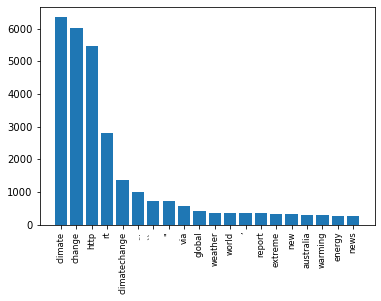

In [45]:
fig, ax0 = plt.subplots()
ax0.bar(count_sort.index, count_sort['counts'])
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

Now that we have the most common words we can look for the vader sentimetn scores to find more insite to the tone of these tweets

In [47]:
analyser = SentimentIntensityAnalyzer()
warnings.filterwarnings('ignore')

In [48]:
en_cl['vader_scores'] = [analyser.polarity_scores(x) for x in en_cl['Full Text']]
en_cl['vader_scores'].head(20)

0     {'neg': 0.0, 'neu': 0.927, 'pos': 0.073, 'comp...
1     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2     {'neg': 0.0, 'neu': 0.681, 'pos': 0.319, 'comp...
3     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
5     {'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'comp...
6     {'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp...
7     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
8     {'neg': 0.076, 'neu': 0.924, 'pos': 0.0, 'comp...
9     {'neg': 0.338, 'neu': 0.662, 'pos': 0.0, 'comp...
10    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
11    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
12    {'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'comp...
13    {'neg': 0.363, 'neu': 0.513, 'pos': 0.124, 'co...
14    {'neg': 0.221, 'neu': 0.779, 'pos': 0.0, 'comp...
15    {'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'comp...
16    {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...
17    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'comp

The code Below is calculationg the differnt scored per post for Postive Negative than Neural feeling in each tweet. Based of the Vader score given

In [50]:
en_cl['pos'] = [x['pos'] for x in en_cl['vader_scores']]
en_cl['pos']


0       0.073
1       0.000
2       0.319
3       0.000
4       0.000
        ...  
7146    0.000
7147    0.000
7148    0.110
7149    0.000
7150    0.269
Name: pos, Length: 7151, dtype: float64

In [58]:
en_cl['neg'] = [x['neg'] for x in en_cl['vader_scores']]
en_cl['neg']

0       0.000
1       0.000
2       0.000
3       0.000
4       0.000
        ...  
7146    0.000
7147    0.163
7148    0.000
7149    0.000
7150    0.000
Name: neg, Length: 7151, dtype: float64

In [60]:
en_cl['neu'] = [x['neu'] for x in en_cl['vader_scores']]
en_cl['neu']

0       0.927
1       1.000
2       0.681
3       1.000
4       1.000
        ...  
7146    1.000
7147    0.837
7148    0.890
7149    1.000
7150    0.731
Name: neu, Length: 7151, dtype: float64

The code below is adding a overall stats score for the sentiments though out the tweets 
Postive Negative than Neutral

In [54]:
stats.describe(en_cl['pos']).mean

0.07545406236889945

In [59]:
stats.describe(en_cl['neg']).mean

0.08293511397007411

In [61]:
stats.describe(en_cl['neu']).mean

0.8416085862117186

### Conclusion

In the end The frequncy score didn't end up giving us much information beyond the fact that people were talking about CLimate Change which was the query was looking for. The vader score ended up revealing a lot more about the data set. This is that much of the conversation on CLimate change that took place on this day in twitter was of a neutral sentiment and that not a lot of people had much negative or postive thoughts on Climate Change.